# Netflix EDA Project 📊
This project performs exploratory data analysis (EDA) on a Netflix dataset.
It involves data cleaning, analyzing content types, release trends, country-wise data, and more.
Tools used: Pandas, Matplotlib, Seaborn.

Downloaded data set from : [**Kaggle**](https://www.kaggle.com/datasets/shivamb/netflix-shows)

Download the CSV file and upload it to your Colab using the file upload panel (left sidebar > "Files" > upload button).

**Or run this code in Colab to upload manually:**

from google.colab import files
uploaded = files.upload()

**Key Terminologies (Understand Before Coding)**

| Term           | Definition                                                                  | Example                               |
| -------------- | --------------------------------------------------------------------------- | ------------------------------------- |
| **DataFrame**  | A table-like structure in pandas (rows + columns)                           | Netflix data loaded as a DataFrame    |
| **Series**     | A single column from a DataFrame                                            | `df['Country']` is a Series           |
| **Null / NaN** | Missing data (not available or blank)                                       | If a movie has no rating, it’s `NaN`  |
| **Filtering**  | Selecting rows based on a condition                                         | All shows released after 2020         |
| **EDA**        | Exploratory Data Analysis: summarizing, visualizing, and understanding data | What kind of content is most popular? |
| **Histogram**  | A chart showing frequency distribution (e.g., shows by release year)        | Number of movies per year             |


In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the CSV file
df = pd.read_csv('netflix_titles.csv') #change if filename differs
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check the shape of the dataset
print("Rows , Columns:", df.shape)

# Show column names
print("\nColumn Names:\n", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Rows , Columns: (8807, 12)

Column Names:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


**🧠 What This Does:**


| Line                  | Purpose                                             |
| --------------------- | --------------------------------------------------- |
| `df.shape`            | Tells you how many rows and columns the dataset has |
| `df.columns.tolist()` | Lists all the column names                          |
| `df.isnull().sum()`   | Shows how many missing values each column has       |


In [22]:
# Drop rows with missing Title, Country, or Release Year
df_cleaned = df.dropna(subset=['title', 'country', 'release_year'])

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Show the cleaned DataFrame
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [23]:
# Check for missing values
print("\nMissing Values:\n", df_cleaned.isnull().sum())

# See a random 5 rows
df_cleaned.sample(5)


Missing Values:
 show_id            0
type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4808,s5473,Movie,Raees,Rahul Dholakia,"Shah Rukh Khan, Mahira Khan, Nawazuddin Siddiq...",India,"May 26, 2017",2017,TV-14,143 min,"Action & Adventure, Dramas, International Movies",After street smart kid Raees rises to become G...
3730,s4305,TV Show,Hymn of Death,NaN,"Lee Jong-suk, Shin Hye-sun, Kim Myeong-su, Par...",South Korea,"December 14, 2018",2018,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","During the Japanese colonial period, married p..."
888,s1230,TV Show,My Way,NaN,"Sherine, Ahmed Fahmi, Bassel Khaiat, Sawsan Ba...",Egypt,"March 6, 2021",2015,TV-14,1 Season,"International TV Shows, TV Dramas","In the 1970s, an aspiring singer struggles to ..."
4550,s5196,TV Show,Together,NaN,"Jeanette Aw, Dai Xiangyu, Elvin Ng, Eelyn Kok,...",Singapore,"November 1, 2017",2009,TV-14,1 Season,"International TV Shows, TV Dramas","Spanning 30 years, a group of dedicated and di..."
2889,s3369,TV Show,A Little Thing Called First Love,NaN,"Lai Kuan-lin, Zhao Jinmai, Wang Runze, Chai We...",China,"October 26, 2019",2019,TV-G,1 Season,"International TV Shows, Romantic TV Shows, Tee...",A shy college student with a knack for drawing...


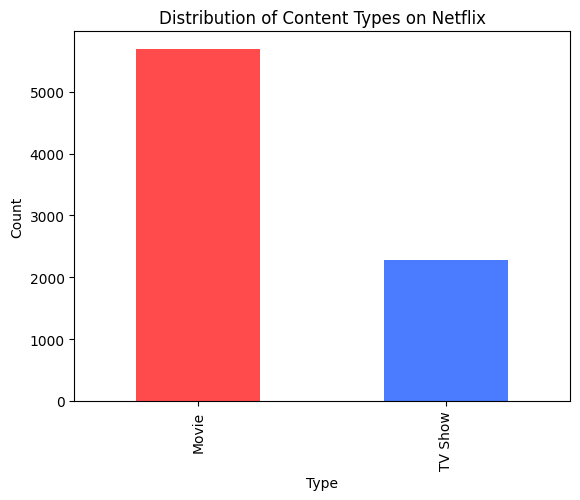

In [6]:
# Count the number of Movies vs TV Shows
type_count = df_cleaned['type'].value_counts()

# Visualize
type_count.plot(kind='bar', color=['#FF4B4B', '#4B7BFF'])
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

📘 **Side Note – New Terms You’ve Used**

| Term               | Meaning                                             |
| ------------------ | --------------------------------------------------- |
| `dropna()`         | Removes rows with missing data in selected columns  |
| `value_counts()`   | Counts occurrences of each unique value in a column |
| `plot(kind='bar')` | Creates a bar chart using pandas’ built-in plotting |



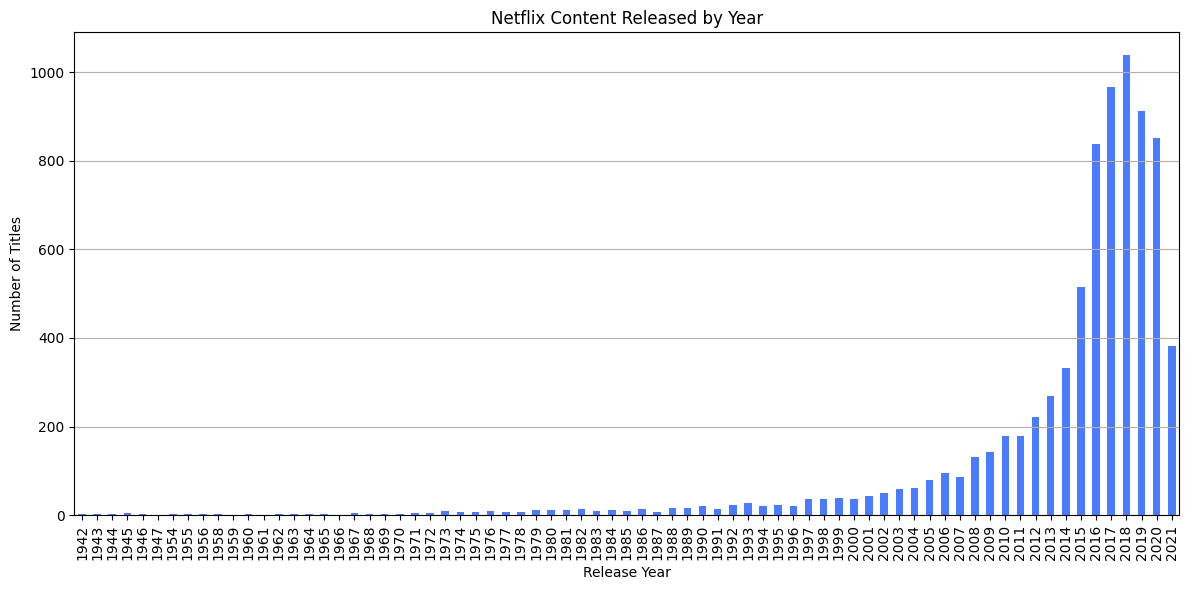

In [7]:
# Count the number of shows released each year
year_counts = df_cleaned['release_year'].value_counts().sort_index()

# Plot it
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color="#4B7BFF")
plt.title('Netflix Content Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

🧠 New Concepts

| Term                     | Meaning                                        |
| ------------------------ | ---------------------------------------------- |
| `value_counts()`         | Counts how many shows per release year         |
| `sort_index()`           | Sorts the years in order (e.g., 2015, 2016...) |
| `plt.figure(figsize=())` | Controls the size of the plot                  |
| `grid(axis='y')`         | Adds horizontal lines for better readability   |


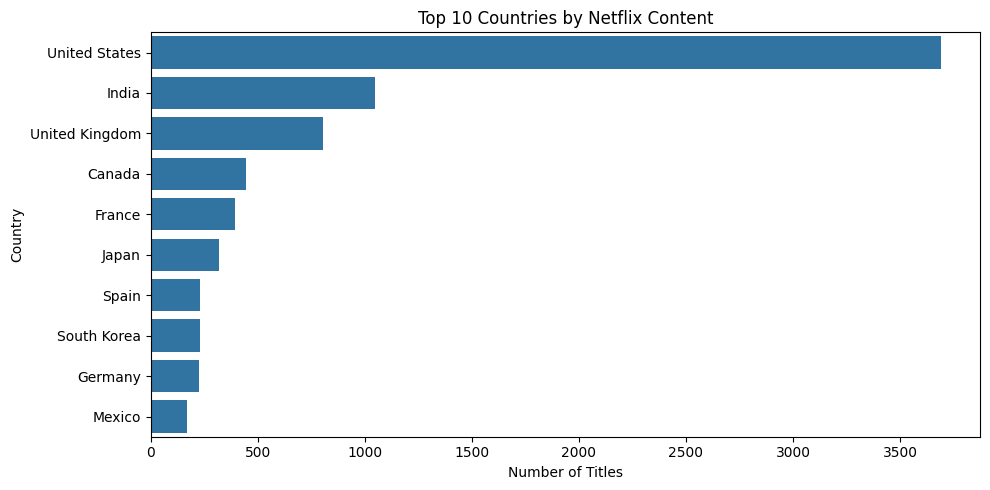

In [25]:
# Drop rows where 'country' is NaN, then split by comma (some rows have multiple countries)
df_countries = df_cleaned.dropna(subset=['country']).copy()

# Make sure all values in 'country' are strings
df_countries['country'] = df_countries['country'].astype(str)

# Split and explode
df_countries['country'] = df_countries['country'].str.split(', ')
df_exploded = df_countries.explode('country')

# Count and plot
country_counts = df_exploded['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

🧠 New Concepts

| Term              | Meaning                                              |
| ----------------- | ---------------------------------------------------- |
| `str.split(', ')` | Splits a string into a list using the comma          |
| `explode()`       | Turns lists into multiple rows (one country per row) |
| `sns.barplot()`   | Makes a horizontal bar chart using Seaborn           |


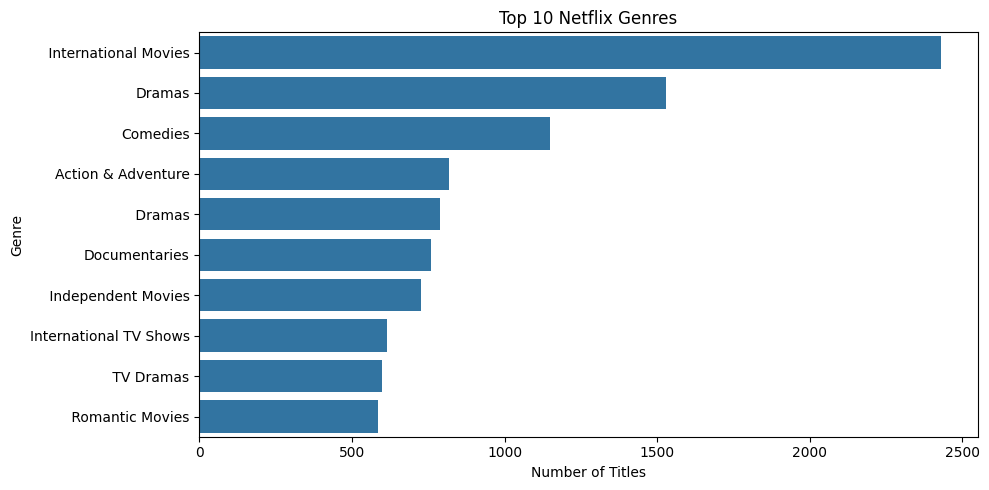

In [26]:
# drop missing genre rows
df_genres = df_cleaned.dropna(subset = ['listed_in'])

# Split and explode
df_genres['genre'] = df_genres['listed_in'].str.split(',')
df_exploded_genres = df_genres.explode('genre')

# Count top 10 genres
genre_counts = df_exploded_genres['genre'].value_counts().head(10)

#plot
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()